In [1]:
from keras import layers, models, Input
import numpy as np
import keras.backend as K

c:\users\b.mehdi\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\b.mehdi\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\b.mehdi\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
img_shape = (28, 28, 1)
batch_size = 16
latent_dim = 2 
input_img = Input(shape=img_shape)

In [3]:
x = layers.Conv2D(32, 3, padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3, padding='same', activation='relu',strides=(2, 2))(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
shape_before_flattening = K.int_shape(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
z = layers.Dense(latent_dim)(x)

encoder = models.Model(input_img, z)

In [4]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 32)                401440

In [5]:
decoder_input = Input(shape=(2,))
d = layers.Dense(np.prod(shape_before_flattening[1:]),activation='relu')(decoder_input)
d = layers.Reshape(shape_before_flattening[1:])(d)
d = layers.Conv2DTranspose(32, 3,padding='same',activation='relu',strides=(2, 2))(d)
d = layers.Conv2D(1, 3,padding='same',activation='sigmoid')(d)

decoder = models.Model(decoder_input,d)

In [6]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 12544)             37632     
                                                                 
 reshape (Reshape)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 28, 28, 32)       18464     
 nspose)                                                         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 1)         289       
                                                                 
Total params: 56,385
Trainable params: 56,385
Non-trainable params: 0
_______________________________________________________

In [7]:
img_decoded = decoder(z)
Autoencoder = models.Model(input_img, img_decoded)
Autoencoder.compile(optimizer = 'rmsprop', loss='binary_crossentropy')

In [8]:
Autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 32)                4014

In [9]:
from keras.datasets import mnist

In [10]:
(x_train, _), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))

In [11]:
Autoencoder.fit(x=x_train, y=x_train, epochs=10, batch_size=batch_size)

Epoch 1/10
3750/3750 [==============================] - 42s 9ms/step - loss: 0.2077
Epoch 2/10
3750/3750 [==============================] - 34s 9ms/step - loss: 0.1860
Epoch 3/10
3750/3750 [==============================] - 33s 9ms/step - loss: 0.1814
Epoch 4/10
3750/3750 [==============================] - 35s 9ms/step - loss: 0.1794
Epoch 5/10
3750/3750 [==============================] - 35s 9ms/step - loss: 0.1785
Epoch 6/10
3750/3750 [==============================] - 34s 9ms/step - loss: 0.1775
Epoch 7/10
3750/3750 [==============================] - 34s 9ms/step - loss: 0.1769
Epoch 8/10
3750/3750 [==============================] - 35s 9ms/step - loss: 0.1764
Epoch 9/10
3750/3750 [==============================] - 34s 9ms/step - loss: 0.1761
Epoch 10/10
3750/3750 [==============================] - 35s 9ms/step - loss: 0.1761


In [12]:
import matplotlib.pyplot as plt
import matplotlib

In [14]:
encoded = encoder.predict(x_train)

1875/1875 [==============================] - 3s 2ms/step


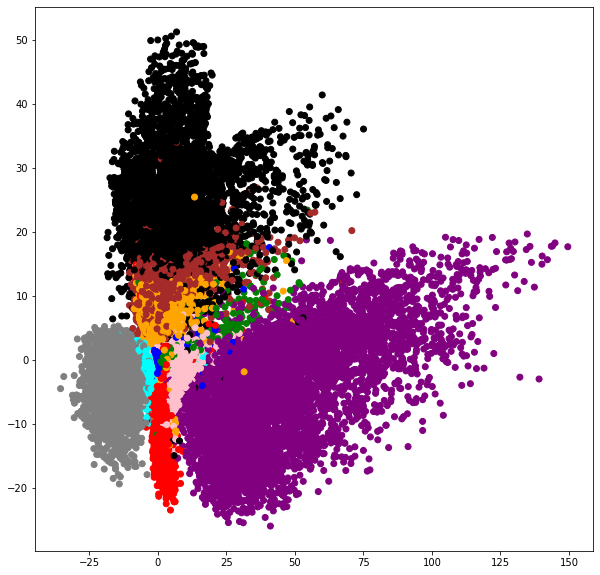

In [15]:
colors=['grey', 'purple', 'blue', 'green', 'orange', 'red','cyan', 'black', 'pink', 'brown',]
fig = plt.figure(figsize=(10,10))
plt.scatter(encoded[:,0],encoded[:,1], c=_, cmap=matplotlib.colors.ListedColormap(colors))


In [73]:
import pandas as pd

In [74]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [75]:
Data = dataframe.values

In [76]:
Data

array([[-0.11252183, -2.8272038 , -3.7738969 , ...,  0.92528624,
         0.19313742,  1.        ],
       [-1.1008778 , -3.9968398 , -4.2858426 , ...,  1.1196209 ,
        -1.4362499 ,  1.        ],
       [-0.56708802, -2.5934502 , -3.8742297 , ...,  0.90422673,
        -0.42179659,  1.        ],
       ...,
       [-1.1229693 , -2.2529248 , -2.8676281 , ..., -2.0083694 ,
        -1.8083338 ,  0.        ],
       [-0.54770461, -1.8895451 , -2.8397786 , ...,  1.1504486 ,
         0.80493225,  0.        ],
       [-1.3517791 , -2.2090058 , -2.5202247 , ..., -1.577823  ,
        -0.68453092,  0.        ]])

In [77]:
Data_ecg = Data[:,0:-1]
labels = Data[:, -1]

In [78]:
labels.shape

(4998,)

In [79]:
Data_ecg.shape

(4998, 140)

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler = MinMaxScaler().fit(Data_ecg)
Data_N = scaler.transform(Data_ecg)

In [84]:
Data_N

array([[0.56575121, 0.40332497, 0.17432985, ..., 0.61919495, 0.6603536 ,
        0.46577817],
       [0.48124682, 0.29266943, 0.1086373 , ..., 0.69085876, 0.67920847,
        0.3450321 ],
       [0.52688582, 0.42543966, 0.16145521, ..., 0.64097497, 0.65831035,
        0.42020836],
       ...,
       [0.479358  , 0.45765568, 0.29062168, ..., 0.28890479, 0.3757224 ,
        0.31745875],
       [0.5285431 , 0.49203388, 0.29419531, ..., 0.74457616, 0.68219946,
        0.51111535],
       [0.45979477, 0.46181072, 0.33520026, ..., 0.35657152, 0.41749517,
        0.40073838]])

In [86]:
train_labels=labels.astype(bool)

In [87]:
train_labels

array([ True,  True,  True, ..., False, False, False])

In [90]:
train_data = Data_N[train_labels]
test_data = Data_N[~train_labels]

In [92]:
train_data.shape

(2919, 140)

In [93]:
test_data.shape

(2079, 140)

In [131]:
test_labels = labels[~train_labels]

In [133]:
test_labels.shape

(2079,)

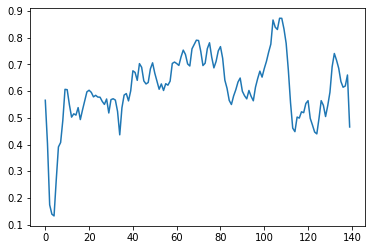

In [94]:
plt.plot(train_data[0])

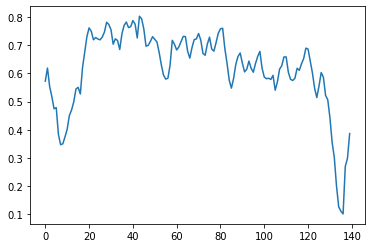

In [95]:
plt.plot(test_data[0])

In [100]:
ecg_input = Input(shape=(140,))
x=layers.Dense(32, activation="relu")(ecg_input)
x=layers.Dense(16, activation="relu")(x)
x=layers.Dense(8, activation="relu")(x)

In [101]:
dec=layers.Dense(16, activation="relu")(x)
dec=layers.Dense(32, activation="relu")(dec)
dec=layers.Dense(140, activation="sigmoid")(dec)

In [102]:
Autoencoder_ecg = models.Model(ecg_input,dec)

In [103]:
Autoencoder_ecg.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 140)]             0         
                                                                 
 dense_19 (Dense)            (None, 32)                4512      
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 dense_22 (Dense)            (None, 16)                144       
                                                                 
 dense_23 (Dense)            (None, 32)                544       
                                                                 
 dense_24 (Dense)            (None, 140)               462

In [104]:
Autoencoder_ecg.compile(optimizer = 'adam', loss = 'mae')

In [106]:
history_ecg = Autoencoder_ecg.fit(train_data, train_data, epochs=20, batch_size=512)

Epoch 1/20
6/6 [==============================] - 0s 8ms/step - loss: 0.1372
Epoch 2/20
6/6 [==============================] - 0s 8ms/step - loss: 0.1285
Epoch 3/20
6/6 [==============================] - 0s 8ms/step - loss: 0.1150
Epoch 4/20
6/6 [==============================] - 0s 6ms/step - loss: 0.1013
Epoch 5/20
6/6 [==============================] - 0s 6ms/step - loss: 0.0867
Epoch 6/20
6/6 [==============================] - 0s 6ms/step - loss: 0.0741
Epoch 7/20
6/6 [==============================] - 0s 6ms/step - loss: 0.0645
Epoch 8/20
6/6 [==============================] - 0s 6ms/step - loss: 0.0577
Epoch 9/20
6/6 [==============================] - 0s 6ms/step - loss: 0.0526
Epoch 10/20
6/6 [==============================] - 0s 6ms/step - loss: 0.0492
Epoch 11/20
6/6 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 12/20
6/6 [==============================] - 0s 6ms/step - loss: 0.0461
Epoch 13/20
6/6 [==============================] - 0s 6ms/step - loss: 0.

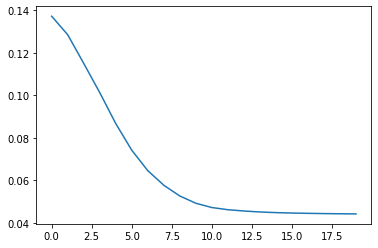

In [110]:
plt.plot(history_ecg.history['loss'])

In [111]:
ecg_rec = Autoencoder_ecg.predict(train_data)

92/92 [==============================] - 0s 2ms/step


In [114]:
from keras import losses

In [115]:
train_loss = losses.mae(ecg_rec, train_data)

In [122]:
Loss_max = np.mean(train_loss) + np.std(train_loss)

In [123]:
Loss_max

0.07293631742644824

In [124]:
def predict(model, data, max_l):
    rec = model.predict(data)
    loss = losses.mae(rec, data)
    pred=np.zeros(len(data))
    for i in range(len(loss)):
        if loss[i]<=max_l:
            pred[i]=1
    return pred 

In [130]:
from sklearn.metrics import accuracy_score

In [134]:
pred = predict(Autoencoder_ecg, test_data, Loss_max)

65/65 [==============================] - 0s 3ms/step


In [135]:
accuracy_score(pred, test_labels)

0.9850889850889851